In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
from sklearn.metrics import r2_score

https://stackoverflow.com/questions/78287460/improving-the-quality-of-error-function-fit-using-python

In [7]:
x = [337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 336, 336, 334, 334, 333, 331, 331, 331, 329, 329, 328, 324, 323, 315, 308, 294, 283, 273, 264, 244, 234, 222, 217, 205, 188, 181, 174, 162, 151, 133, 126, 117, 112, 105, 96, 95, 87, 80, 73, 62, 59, 58, 52, 40, 35, 33, 31, 30, 29, 29, 26, 23, 21, 19, 18, 16, 15, 15, 15, 15, 15, 15, 14, 13, 12, 12, 12, 12, 12, 11, 10, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0]
x = np.array([1 - (i / 1012) for i in x])

t_start = 0.0
t_end = 1e2
timesteps = int(1e3 * t_end) + 1
t = np.linspace(t_start, t_end, timesteps)
t = t[:len(x)]

In [9]:
def model(x, x0, s, A, c):
    law = stats.norm(loc=x0, scale=s)
    return A * law.cdf(x) + c

In [25]:
def model2(x, x0, A, c):
    return c + A / (A + np.exp(-(x - x0)))

In [26]:
popt, pcov = optimize.curve_fit(model, t, x)
popt, pcov

(array([0.0534708 , 0.01188575, 0.32716774, 0.66368917]),
 array([[ 2.67320113e-08, -2.51209564e-09, -3.45782684e-08,
          8.96149464e-08],
        [-2.51209564e-09,  4.86073002e-08,  1.89549506e-07,
         -1.14281405e-07],
        [-3.45782684e-08,  1.89549506e-07,  2.60885182e-06,
         -1.57292936e-06],
        [ 8.96149464e-08, -1.14281405e-07, -1.57292936e-06,
          1.48232580e-06]]))

In [33]:
popt2, pcov2 = optimize.curve_fit(model2, t, x, p0=[0.04, 10, 0.66])
popt2, pcov2

(array([ 4.46452726, 81.85217454,  0.34900903]),
 array([[ 2.71279420e+12,  2.22050175e+14, -6.31824857e+06],
        [ 2.22050175e+14,  1.81754593e+16, -5.17732170e+08],
        [-6.31824857e+06, -5.17732170e+08,  1.73971358e+03]]))

In [34]:
xhat = model(t, *popt)
xhat2 = model2(t, *popt2)

In [35]:
score = r2_score(x, xhat)
score2 = r2_score(x, xhat2)
print(score, score2)

0.9979168932633076 0.1140976693879715


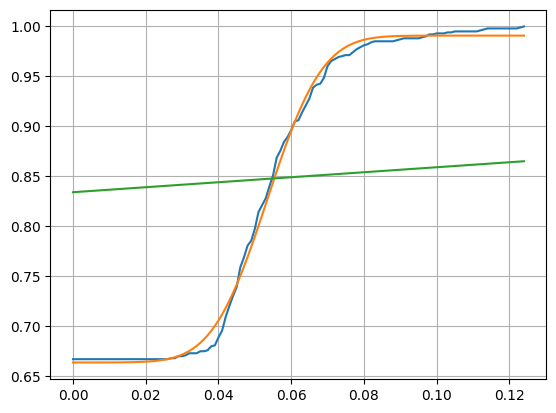

In [36]:
fig, axe = plt.subplots()
axe.plot(t, x)
axe.plot(t, xhat)
axe.plot(t, xhat2)
axe.grid()